# Load Dataset

https://huggingface.co/datasets/doc2dial#data-fields


In [1]:
from datasets import load_dataset

split = "train"
cache_dir = "./data_cache"

#User's turn: utterance= question, reference=grounding document span_id, can be empty, "precondition"/"solution" are the
#actual grounding spans
#Gold label for grounding
dialogue_dataset = load_dataset(
    "doc2dial",
    name="dialogue_domain",  # this is the name of the dataset for the second subtask, dialog generation
    split=split,
    ignore_verifications=True,
    cache_dir=cache_dir,
)

document_dataset = load_dataset(
    "doc2dial",
    name="document_domain",
    split=split,
    ignore_verifications=True,
    cache_dir=cache_dir,
)

Reusing dataset doc2dial (./data_cache/doc2dial/dialogue_domain/1.0.1/765cb4d9af421b599d910080fd61b4a43440c1232693876470ef3245daa5fa4c)
Reusing dataset doc2dial (./data_cache/doc2dial/document_domain/1.0.1/765cb4d9af421b599d910080fd61b4a43440c1232693876470ef3245daa5fa4c)


### Investigate what the the data looks like

Have a first look a the data, how much and what kind of data is there

Questions:
1. How many domains and how frequent are those?
2. How many user utterances don't have a span id, have a "precondition"/"solution"?
3. How often is each span from the documents data used in the dialogue data?

In [2]:
#using pd's DF
import pandas as pd

dialogue_full_df = pd.DataFrame(data=dialogue_dataset)
document_full_df = pd.DataFrame(data=document_dataset)

#column names
domain_col = 'domain'
doc_id_col = 'doc_id'
spans_col = 'spans'
id_sp_col = 'id_sp'
text_sp_col = 'text_sp'

Info and Describe for Dialogue and a few manual counts

In [3]:
dialogue_full_df

,dial_id,doc_id,domain,turns
0,9f44c1539efe6f7e79b02eb1b413aa43,Top 5 DMV Mistakes and How to Avoid Them#3_0,dmv,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."
1,88ecf840ea87f8c53faff15d4f0bb214,Top 5 DMV Mistakes and How to Avoid Them#3_0,dmv,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."
2,3c079944cf36c05b45f668669cc3301b,Top 5 DMV Mistakes and How to Avoid Them#3_0,dmv,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."
3,9fa8c68e2f211edad9fb65eb5897d600,Top 5 DMV Mistakes and How to Avoid Them#3_0,dmv,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."
4,423bd6a66d14c22f8be69add96679255,Top 5 DMV Mistakes and How to Avoid Them#3_0,dmv,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."
...,...,...,...,...
3469,38ff454964b59d69c1fb9e1848c1afe9,Student Loan Repayment | Federal Student Aid#1_0,studentaid,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."
3470,4c03dc84fa163070675bdb92970d65d1,Student Loan Repayment | Federal Student Aid#1_0,studentaid,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."
3471,f709b7ec749abc04bf305dcf8b88e916,Student Loan Repayment | Federal Student Aid#1_0,studentaid,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."
3472,fd4b8614da5cf99f37ae135c18b10881,Student Loan Repayment | Federal Student Aid#1_0,studentaid,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."


In [4]:
dialogue_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dial_id  3474 non-null   object
 1   doc_id   3474 non-null   object
 2   domain   3474 non-null   object
 3   turns    3474 non-null   object
dtypes: object(4)
memory usage: 108.7+ KB


In [5]:
dialogue_full_df.describe(include=object)

,dial_id,doc_id,domain,turns
count,3474,3474,3474,3474
unique,3474,415,4,3474
top,9f44c1539efe6f7e79b02eb1b413aa43,Apply for Retirement Benefits | SSA#1_0,dmv,"[{'turn_id': 1, 'role': 'user', 'da': 'query_c..."
freq,1,16,998,1


In [6]:

dialogue_full_df['dial_id']

0       9f44c1539efe6f7e79b02eb1b413aa43
1       88ecf840ea87f8c53faff15d4f0bb214
2       3c079944cf36c05b45f668669cc3301b
3       9fa8c68e2f211edad9fb65eb5897d600
4       423bd6a66d14c22f8be69add96679255
                      ...               
3469    38ff454964b59d69c1fb9e1848c1afe9
3470    4c03dc84fa163070675bdb92970d65d1
3471    f709b7ec749abc04bf305dcf8b88e916
3472    fd4b8614da5cf99f37ae135c18b10881
3473    1bd63c7902f89f095942937e9cf68bbd
Name: dial_id, Length: 3474, dtype: object

In [7]:
dialogue_full_df[doc_id_col].value_counts()

Apply for Retirement Benefits | SSA#1_0                                                                       16
Learn About Retirement Benefits | SSA#1_0                                                                     16
Benefits Planner | Social Security Administration#1_0                                                         16
Disability Benefits | Social Security Administration#1_0                                                      16
Supplemental Security Income (SSI) Benefits | Social Security Administration#1_0                              16
                                                                                                              ..
Learn what documents you will need to get a Social Security Card | Social Security Administration#13_0_1       1
Learn what documents you will need to get a Social Security Card | Social Security Administration#12_0_1_2     1
Learn what documents you will need to get a Social Security Card | Social Security Administratio

In [8]:
dialogue_full_df[doc_id_col].value_counts()

Apply for Retirement Benefits | SSA#1_0                                                                       16
Learn About Retirement Benefits | SSA#1_0                                                                     16
Benefits Planner | Social Security Administration#1_0                                                         16
Disability Benefits | Social Security Administration#1_0                                                      16
Supplemental Security Income (SSI) Benefits | Social Security Administration#1_0                              16
                                                                                                              ..
Learn what documents you will need to get a Social Security Card | Social Security Administration#13_0_1       1
Learn what documents you will need to get a Social Security Card | Social Security Administration#12_0_1_2     1
Learn what documents you will need to get a Social Security Card | Social Security Administratio

Insights:
- there are four different domains, all seem to be approx equally used with 'dmv' being the most frequent
- there are 415 different documents, quite a few used only once, most frequent use is 16 for a few documents

Look into how turn: here just the first turn

In [9]:
dialogue_full_df['turns']
first_turn = dialogue_full_df['turns'][0]
normalised_first_turn = pd.json_normalize(first_turn)

Looking into reference columns in turns

In [10]:
normalised_first_turn[['references']]
first_references = normalised_first_turn['references'][0]
pd.json_normalize(first_references)

,sp_id,label
0,4,precondition


Info and Describe for document

In [11]:
document_full_df

,domain,doc_id,title,doc_text,spans,doc_html_ts,doc_html_raw
0,ssa,Benefits Planner: Survivors | Planning For You...,Benefits Planner: Survivors | Planning For You...,\n\nBenefits Planner: Survivors | Planning For...,"[{'id_sp': '1', 'tag': 'h2', 'start_sp': 0, 'e...","<main><section><div><h2 sent_id=""1"" text_id=""1...","<main class=""content"" id=""content"" role=""main""..."
1,ssa,Benefits Planner: Survivors | Planning For You...,Benefits Planner: Survivors | Planning For You...,"As you plan for the future , you'll want to th...","[{'id_sp': '1', 'tag': 'u', 'start_sp': 0, 'en...","<article><section><div tag_id=""1""><u sent_id=""...",<article>\n<section>\n<p>As you plan for the f...
2,ssa,Benefits Planner: Disability | How You Apply |...,Benefits Planner: Disability | How You Apply |...,\n\nBenefits Planner: Disability | How You App...,"[{'id_sp': '1', 'tag': 'h2', 'start_sp': 0, 'e...","<main><section><div><h2 sent_id=""1"" text_id=""1...","<main class=""content"" id=""content"" role=""main""..."
3,ssa,Benefits Planner: Disability | How You Apply |...,Benefits Planner: Disability | How You Apply |...,You should apply for disability benefits as so...,"[{'id_sp': '1', 'tag': 'u', 'start_sp': 0, 'en...","<article><section><div tag_id=""1""><u sent_id=""...",<article>\n<section>\n<p>You should apply for ...
4,ssa,Learn what documents you will need to get a So...,Learn what documents you will need to get a So...,\n\nCorrected Card for a Foreign Born U.S. Cit...,"[{'id_sp': '1', 'tag': 'h3', 'start_sp': 0, 'e...","<article><h3 sent_id=""1"" text_id=""1"">Corrected...",<article>\n<h3>Corrected Card for a Foreign Bo...
...,...,...,...,...,...,...,...
483,studentaid,Finding and Applying for Scholarships | Federa...,Finding and Applying for Scholarships | Federa...,\n\nFind and apply for as many scholarships as...,"[{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e...",<section><div><div><div><div><div><div><div><d...,"<section class=""section section-content"" id=""s..."
484,studentaid,Loan Repayment Checklist | Federal Student Aid...,Loan Repayment Checklist | Federal Student Aid#1,\n\nAre you a federal student loan borrower? A...,"[{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e...",<section><div><div><div><div><div><div><div><d...,"<section class=""section section-content"" id=""s..."
485,studentaid,Total and Permanent Disability Discharge | Fed...,Total and Permanent Disability Discharge | Fed...,\n\nIf you re totally and permanently disabled...,"[{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e...",<section><div><div><div><div><div><div><div><d...,"<section class=""section section-content"" id=""s..."
486,studentaid,Avoiding Default | Federal Student Aid#1_0,Avoiding Default | Federal Student Aid#1,\n\nThere are steps you can take to repay your...,"[{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e...",<section><div><div><div><div><div><div><div><d...,"<section class=""section section-content"" id=""s..."


In [12]:
document_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   domain        488 non-null    object
 1   doc_id        488 non-null    object
 2   title         488 non-null    object
 3   doc_text      488 non-null    object
 4   spans         488 non-null    object
 5   doc_html_ts   488 non-null    object
 6   doc_html_raw  488 non-null    object
dtypes: object(7)
memory usage: 26.8+ KB


In [13]:
document_full_df.describe(include=object)

,domain,doc_id,title,doc_text,spans,doc_html_ts,doc_html_raw
count,488,488,488,488,488,488,488
unique,4,488,475,475,475,476,476
top,dmv,Benefits Planner: Survivors | Planning For You...,Learn what documents you will need to get a So...,\n\nCorrected Card for a Noncitizen Child \nIf...,"[{'id_sp': '1', 'tag': 'h3', 'start_sp': 0, 'e...","<article><h3 sent_id=""1"" text_id=""1"">Corrected...",<article>\n<h3>Corrected Card for a Noncitizen...
freq,149,1,4,4,4,4,4


In [14]:
document_full_df[domain_col].value_counts()

dmv           149
va            138
ssa           109
studentaid     92
Name: domain, dtype: int64

In [15]:
document_full_df["title"].value_counts()

Learn what documents you will need to get a Social Security Card | Social Security Administration#6    4
Learn what documents you will need to get a Social Security Card | Social Security Administration#4    3
How Financial Aid Works | Federal Student Aid#1                                                        2
Learn what documents you will need to get a Social Security Card | Social Security Administration#2    2
Learn what documents you will need to get a Social Security Card | Social Security Administration#7    2
                                                                                                      ..
Post-9/11 GI Bill | Veterans Affairs#1                                                                 1
Request a Board Appeal | Veterans Affairs#1                                                            1
Exposure To Hazardous Chemicals And Materials | Veterans Affairs#1                                     1
GI Bill | Veterans Affairs#1                           

Surprisingly not all document titles and spans are unique. Only 475 are, 13 are duplicated?


Look into the spans json a bit more

In [16]:

document_full_df[spans_col]
# spans are a json array for each document. Each item in the json array is a span with id_sp being the id of the span

0      [{'id_sp': '1', 'tag': 'h2', 'start_sp': 0, 'e...
1      [{'id_sp': '1', 'tag': 'u', 'start_sp': 0, 'en...
2      [{'id_sp': '1', 'tag': 'h2', 'start_sp': 0, 'e...
3      [{'id_sp': '1', 'tag': 'u', 'start_sp': 0, 'en...
4      [{'id_sp': '1', 'tag': 'h3', 'start_sp': 0, 'e...
                             ...                        
483    [{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e...
484    [{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e...
485    [{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e...
486    [{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e...
487    [{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e...
Name: spans, Length: 488, dtype: object

In [17]:
#looking into one span
one_doc_span = document_full_df[spans_col][0]
# reading a frame into pandas
one_doc_span_df = pd.DataFrame(one_doc_span)
one_doc_span_df

,id_sp,tag,start_sp,end_sp,text_sp,title,parent_titles,id_sec,start_sec,text_sec,end_sec
0,1,h2,0,61,\n\nBenefits Planner: Survivors | Planning For...,Benefits Planner: Survivors | Planning For You...,[],t_0,0,\n\nBenefits Planner: Survivors | Planning For...,61
1,2,u,61,90,"As you plan for the future ,",Benefits Planner: Survivors | Planning For You...,[],1,61,"As you plan for the future , you'll want to th...",274
2,3,u,90,168,you'll want to think about what your family wo...,Benefits Planner: Survivors | Planning For You...,[],1,61,"As you plan for the future , you'll want to th...",274
3,4,u,168,274,Social Security can help your family if you ha...,Benefits Planner: Survivors | Planning For You...,[],1,61,"As you plan for the future , you'll want to th...",274
4,5,u,274,317,You can earn up to four credits each year.,Benefits Planner: Survivors | Planning For You...,[],2,274,You can earn up to four credits each year. In ...,493
...,...,...,...,...,...,...,...,...,...,...,...
94,95,u,6174,6331,This assumes they're eligible for retirement b...,Other Things You Need To Know,[],29,6018,"If your widow, widower, or surviving divorced ...",6331
95,96,u,6331,6347,"In many cases ,",Other Things You Need To Know,[],30,6331,"In many cases , a widow or widower can begin r...",6500
96,97,u,6347,6500,a widow or widower can begin receiving one ben...,Other Things You Need To Know,[],30,6331,"In many cases , a widow or widower can begin r...",6500
97,98,u,6500,6664,"If your widow, widower, or surviving divorced ...",Other Things You Need To Know,[],31,6500,"If your widow, widower, or surviving divorced ...",6726


In [18]:
one_doc_span_df.describe(include=object)

,id_sp,tag,text_sp,title,parent_titles,id_sec,text_sec
count,99,99,99,99,99,99,99
unique,99,3,98,8,2,39,39
top,1,u,"Widow or widower ,",How Much Would Your Survivors Receive,[],18,These are examples of monthly benefit payments...
freq,1,91,2,22,92,14,14


In [19]:
one_doc_span_df.describe(include=object)

,id_sp,tag,text_sp,title,parent_titles,id_sec,text_sec
count,99,99,99,99,99,99,99
unique,99,3,98,8,2,39,39
top,1,u,"Widow or widower ,",How Much Would Your Survivors Receive,[],18,These are examples of monthly benefit payments...
freq,1,91,2,22,92,14,14


Each span is unique, in this docment there are 99 spans, the interesting columns are id_sp and text_sp

In [20]:
# want to flatten these spans so we have their json keys as columns
# new dataset with domain, doc_id and from json id_sp, text_sp
# not sure if we should keep this all in one big df or a dv per doc_id?
# first try  to flatten it for one document
document_important_cols_df = document_full_df[[domain_col, doc_id_col, spans_col]]
document_important_cols_df

,domain,doc_id,spans
0,ssa,Benefits Planner: Survivors | Planning For You...,"[{'id_sp': '1', 'tag': 'h2', 'start_sp': 0, 'e..."
1,ssa,Benefits Planner: Survivors | Planning For You...,"[{'id_sp': '1', 'tag': 'u', 'start_sp': 0, 'en..."
2,ssa,Benefits Planner: Disability | How You Apply |...,"[{'id_sp': '1', 'tag': 'h2', 'start_sp': 0, 'e..."
3,ssa,Benefits Planner: Disability | How You Apply |...,"[{'id_sp': '1', 'tag': 'u', 'start_sp': 0, 'en..."
4,ssa,Learn what documents you will need to get a So...,"[{'id_sp': '1', 'tag': 'h3', 'start_sp': 0, 'e..."
...,...,...,...
483,studentaid,Finding and Applying for Scholarships | Federa...,"[{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e..."
484,studentaid,Loan Repayment Checklist | Federal Student Aid...,"[{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e..."
485,studentaid,Total and Permanent Disability Discharge | Fed...,"[{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e..."
486,studentaid,Avoiding Default | Federal Student Aid#1_0,"[{'id_sp': '1', 'tag': 'h1', 'start_sp': 0, 'e..."


In [21]:
first_span = document_full_df[spans_col][0]
normalised_first_span = pd.json_normalize(first_span)
normalised_first_span[[id_sp_col, text_sp_col]]

# row_1_df =document_important_cols_df.iloc[0]
# type(row_1_df)
# pd.json_normalize(row_1_df)
# normalised_df = pd.json_normalize(document_df.to_dict() , meta=[domain_col, doc_id_col, spans_col], record_path='spans')
# type(normalised_df)
# type(document_df.spans)
# document_df.spans[0]


# one_doc_span_df[[id_sp_col, text_sp_col]]
#
# pd.json_normalize(document_important_cols_df.spans)



,id_sp,text_sp
0,1,\n\nBenefits Planner: Survivors | Planning For...
1,2,"As you plan for the future ,"
2,3,you'll want to think about what your family wo...
3,4,Social Security can help your family if you ha...
4,5,You can earn up to four credits each year.
...,...,...
94,95,This assumes they're eligible for retirement b...
95,96,"In many cases ,"
96,97,a widow or widower can begin receiving one ben...
97,98,"If your widow, widower, or surviving divorced ..."


Insights from looking at the data structure:
For training I will need the following data:
From Dialogue:
doc_id - Grounding document
turns.utterance -> Dialogue history
references.sp_id -> ID for the output text_sp

From Documents:
To get output span:
doc_id -> spans -> id_sp -> text_sp column is the actual output span


# Some stats about the data

In [22]:
import pandas as pd

#function to get all dialogue ids for doc id


#all doc ids
unique_doc_ids = set(dialogue_dataset['doc_id'])
print(f'Number of documents: {len(unique_doc_ids)}')

#table to be calculated
data_stats_df = pd.DataFrame(
    columns=['doc_id', 'number_dialogs', 'number_turns', 'number_user_utterances', 'number_agent_utterance',
             'number_spans', 'max_span_referenced', 'number_spans_never_referenced', 'spans'])
for i, doc_id in enumerate(unique_doc_ids):
    # doing it with the dataset this is way too slow
    # dialogues_for_doc_id = dialogue_dataset.filter(lambda doc: doc['doc_id'] == doc_id)
    # using dataframe instead
    dialogues_for_doc_id = dialogue_full_df.loc[dialogue_full_df['doc_id'] == doc_id]
    count_dialogues = dialogues_for_doc_id.shape[0]

    document = document_full_df.loc[document_full_df['doc_id'] == doc_id]

    # getting the spans for that doc id
    spans_df = [pd.json_normalize(span) for span in document['spans']][0]

    #dictionary to keep a count how many times a span id was used in the dialogue
    spans_counts = dict.fromkeys(spans_df['id_sp'].tolist(), 0)

    #turns
    count_turns = 0
    count_user_utterances = 0
    count_agent_utterances = 0

    #for all turns in the dialogues for that document
    for turns_list in dialogues_for_doc_id['turns']:
        count_turns += len(turns_list)
        #for each turn
        for turn in turns_list:
            #count the spans that are being references
            for span_references in turn['references']:
                spans_counts[span_references['sp_id']] += 1
            #count the utterances by role
            if turn['role'] == 'user':
                count_user_utterances += 1
            if turn['role'] == 'agent':
                count_agent_utterances += 1

    #more span information
    #how many spans does this doc have
    number_spans = len(spans_counts)
    #counts for different ids as a list
    span_count_values = list(spans_counts.values())
    #mas use of the same span
    max_count = max(span_count_values)
    #spans that are never used
    zero_spans = span_count_values.count(0)
    data_stats_df.loc[i] = [doc_id, count_dialogues, count_turns, count_user_utterances, count_agent_utterances,
                            number_spans, max_count, zero_spans,
                            spans_counts]

data_stats_df

Number of documents: 415


,doc_id,number_dialogs,number_turns,number_user_utterances,number_agent_utterance,number_spans,max_span_referenced,number_spans_never_referenced,spans
0,Learn what documents you will need to get a So...,1,12,6,6,51,2,43,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': ..."
1,Benefit Verification Letter | Social Security...,8,100,51,49,23,16,5,"{'1': 5, '2': 10, '3': 3, '4': 4, '5': 16, '6'..."
2,VA Vocational Rehabilitation (Chapter 31) | Ve...,8,96,51,45,17,16,1,"{'1': 8, '2': 16, '3': 6, '4': 6, '5': 6, '6':..."
3,Veterans’ Educational Assistance Program (VEAP...,8,107,54,53,71,16,33,"{'1': 8, '2': 12, '3': 12, '4': 0, '5': 12, '6..."
4,Reporting Parent Information | Federal Student...,10,122,63,59,140,16,91,"{'1': 3, '2': 3, '3': 5, '4': 4, '5': 4, '6': ..."
...,...,...,...,...,...,...,...,...,...
410,New CDL testing and commercial learner permit ...,6,87,44,43,102,7,46,"{'1': 0, '2': 2, '3': 2, '4': 2, '5': 2, '6': ..."
411,Let the Buyer be Aware#3_0,4,55,27,28,209,5,156,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': ..."
412,How to check a title or lien status#1_0,6,77,39,38,60,12,27,"{'1': 6, '2': 12, '3': 4, '4': 4, '5': 4, '6':..."
413,Foreign Programs | Veterans Affairs#1_0,8,100,53,47,96,16,71,"{'1': 8, '2': 16, '3': 6, '4': 0, '5': 14, '6'..."


Text(0.5, 0, 'Number of Turns')

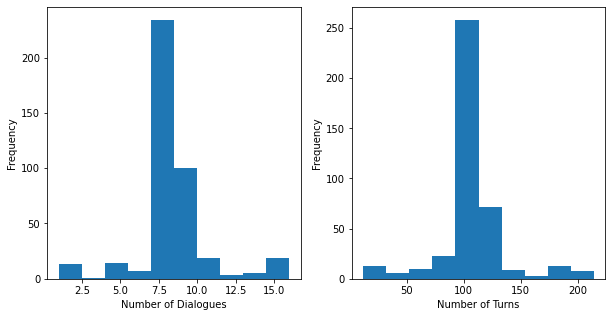

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot1 = data_stats_df['number_dialogs'].plot(kind='hist', ax=axs[0])
plot1.set_xlabel('Number of Dialogues')
plot2 = data_stats_df['number_turns'].plot(kind='hist', ax=axs[1])
plot2.set_xlabel('Number of Turns')


Text(0.5, 0, 'Number of spans never used')

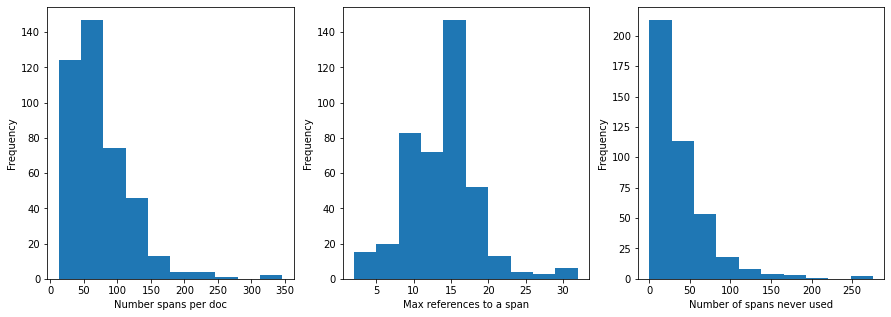

In [24]:
span_usage_stats = data_stats_df[['doc_id', 'number_spans', 'max_span_referenced', 'number_spans_never_referenced']]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot1 = data_stats_df['number_spans'].plot(kind='hist', ax=axs[0])
plot1.set_xlabel('Number spans per doc')
plot2 = data_stats_df['max_span_referenced'].plot(kind='hist', ax=axs[1])
plot2.set_xlabel('Max references to a span')
plot3 = data_stats_df['number_spans_never_referenced'].plot(kind='hist', ax=axs[2])
plot3.set_xlabel('Number of spans never used')


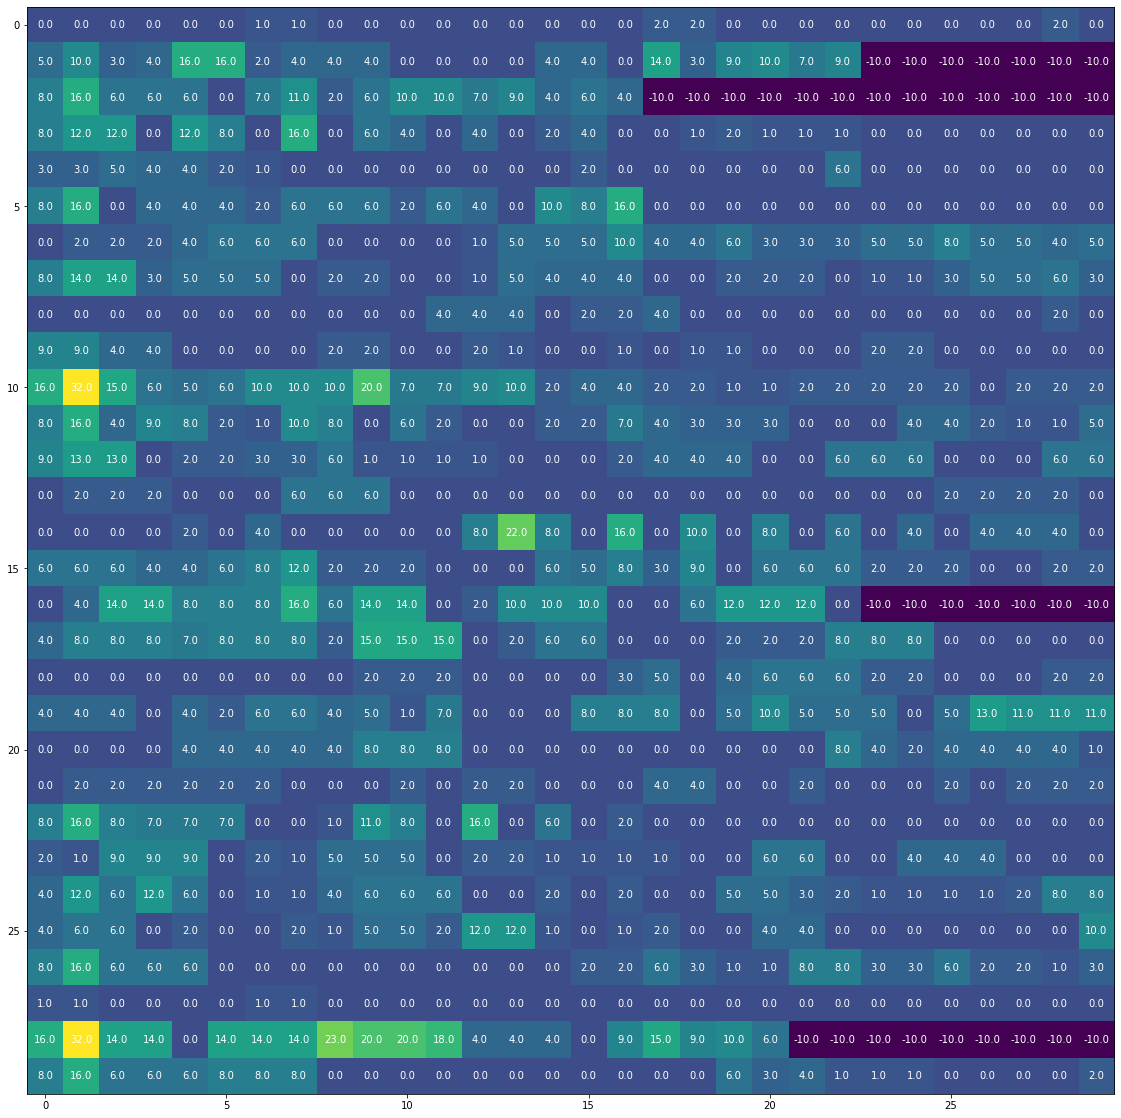

In [25]:
#Heat map of the span's usage. Given not all documents have the same number of spans, the value for a none existing span will be -10 (to have a very different colour)
#0 means the span is present but has never been referenced in a dialogue
#to do this the spans column is converted into a numpy array
#carefull! the numpy index is starting at 0  not 1 like the span ids. So index 0  is id_sp '1', index 1 is id_sp '2' and so fort
import numpy as np

spans_stats = data_stats_df['spans']
max_spans = max(data_stats_df['number_spans'])
number_documents = data_stats_df.shape[0]

spans_reference_counts = -10 * np.ones((number_documents, max_spans))

for row_index, span_st in enumerate(spans_stats):
    for column_index, reference_count in enumerate(span_st.values()):
        spans_reference_counts[row_index, column_index] = reference_count

#plotting the resulting array
fig, ax = plt.subplots(figsize=(20, 20))
small_reference_count = spans_reference_counts[0:30, 0:30]
num_rows, num_cols = small_reference_count.shape
im = ax.imshow(small_reference_count)

for row in range(num_rows):
    for column in range(num_cols):
        text = ax.text(column, row, spans_reference_counts[row, column],
                       ha="center", va="center", color="w")
plt.show()

<AxesSubplot:>

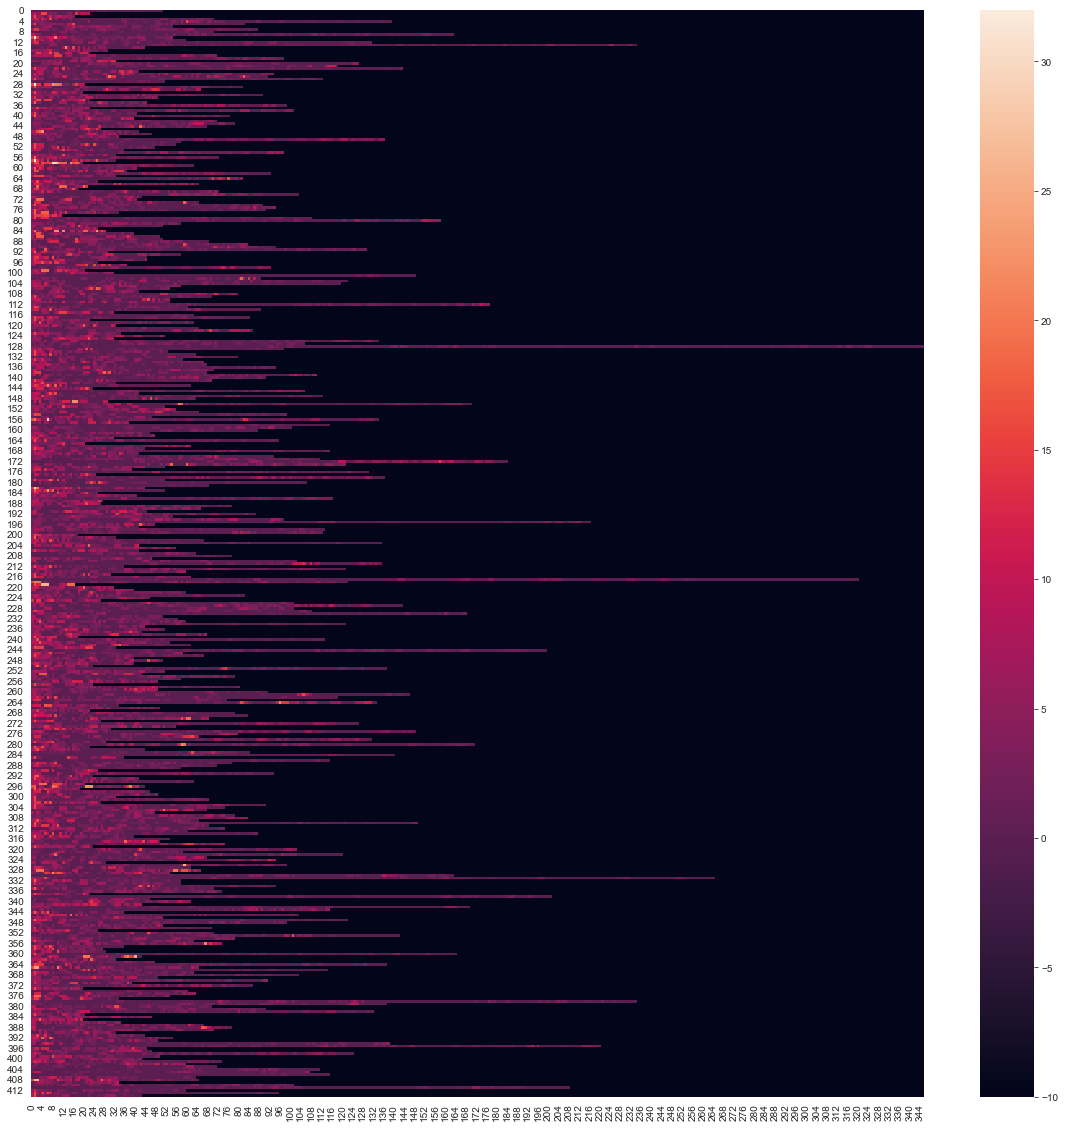

In [26]:
#same in seaborn as it has a bit better heatmaps out of the box
import seaborn as sns;

sns.set_style("dark")

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(ax=ax, data=spans_reference_counts)


### Conclusion

Most spans are hardly ever used -> It will be hard to learn from the span annotation of the data provide

In [27]:
#Docids in Dialogue vs doc ids in documents training data
docid_unique_dialogue = set(dialogue_dataset['doc_id'])
print(f'Number of documents in dialogue: {len(docid_unique_dialogue)}')

docid_unique_documents = set(document_dataset['doc_id'])
print(f'Number of documents in documents: {len(docid_unique_documents)}')

documents_only_in_dialogue = docid_unique_dialogue.difference(docid_unique_documents)
print(f'Document ids that are just in the Dialogue not in the documents dataset: {documents_only_in_dialogue}')

documents_only_in_documents = docid_unique_documents.difference(docid_unique_dialogue)
print(
    f'Document ids that are just in the Documents dataset not in the Dialogue dataset, e.g never referenced. Count={len(documents_only_in_documents)}, ids: {documents_only_in_documents}')


Number of documents in dialogue: 415
Number of documents in documents: 488
Document ids that are just in the Dialogue not in the documents dataset: set()
Document ids that are just in the Documents dataset not in the Dialogue dataset, e.g never referenced. Count=73, ids: {'Understanding Delinquency and Default | Federal Student Aid#1_0', 'Benefits Planner: Retirement | Benefits For Your Family | Social Security Administration#2_0', 'Board hearings with a Veterans Law Judge | Veterans Affairs#1_0', 'Servicemembers’ Group Life Insurance (SGLI) | Veterans Affairs#1_0', 'Link to Us | Federal Student Aid#1_0', 'Benefits Planner: Retirement | Benefits For Your Family | Social Security Administration#1_0', 'Benefits Planner: Retirement | Applying for Medicare Only | Social Security Administration#2_0', 'Feedback Center#1_0', 'Benefits Planner: Disability | Are You Working | Social Security Administration#1_0', 'VA.gov Home | Veterans Affairs#1_0', 'Resources for non US citizens#3_0', 'Program

# Dialogue Dataset for Evaluation



In [49]:
import pandas as pd

#get all relevant dialogue data for a doc_id
doc_id = 'Co-sign Your Spouse\'s Income-Driven Repayment Plan Application | Federal Student Aid#1_0'

dialogue_eval_df = pd.DataFrame(columns=['doc_id', 'turn_id', 'user_utterance', 'user_sp_ids',
                                         'agent_sp_ids'])

#using df as dataset is way too slow to do this
dialogues_for_doc = dialogue_full_df.loc[dialogue_full_df['doc_id'] == doc_id]

#resetting all variables
user_turn_index = 0
user_utterance = ''
user_sps = []
turn_id = ''
agent_sps = []
role = ''
first_user = True
#for all list of turns in each dialogue
for dialogue_index, turns in enumerate(dialogues_for_doc['turns']):

    #for each turn in a dialogue
    for turn in turns:
        role = turn['role']

        # for the very first user role only
        if role == 'user' and first_user == True:
            turn_id = turn['turn_id']
            user_utterance =turn['utterance']
            user_sps = [ref['sp_id'] for ref in turn['references']]
            first_user = False
        elif role == 'user' and first_user == False:
            # we've come to the next user turn
            #write previous user's row before overwriting it with this users data
            dialogue_eval_df.loc[user_turn_index] = [doc_id, turn_id, user_utterance, user_sps, agent_sps]
            #remember this user's data
            user_utterance = turn['utterance']
            turn_id = turn['turn_id']
            user_sps = [ref['sp_id'] for ref in turn['references']]
            #reset for next row
            agent_sps = []
            user_turn_index += 1
        elif role == 'agent':
            #gather agent spans but don't write the row just yet
            agent_sps.extend([ref['sp_id'] for ref in turn['references']])

#write the last line to the dataframe if the last dialogue's turn ended with an agent
if role == 'agent':
    dialogue_eval_df.loc[user_turn_index] = [doc_id, turn_id, user_utterance, user_sps, agent_sps]


dialogue_eval_df

,doc_id,turn_id,user_utterance,user_sp_ids,agent_sp_ids
0,Co-sign Your Spouse's Income-Driven Repayment ...,1,II'm going to be co-signing a federal aid loan...,[1],"[2, 3]"
1,Co-sign Your Spouse's Income-Driven Repayment ...,4,No. I'm not sure how it works.,[3],[]
2,Co-sign Your Spouse's Income-Driven Repayment ...,5,Does it matter that the Income-Driven Repaymen...,[12],[13]
3,Co-sign Your Spouse's Income-Driven Repayment ...,7,Who all can co-sign for this?,[16],[17]
4,Co-sign Your Spouse's Income-Driven Repayment ...,9,Do I need a Financial Information Note when I ...,[26],[26]
5,Co-sign Your Spouse's Income-Driven Repayment ...,11,What if I can't find the Co-sign code?,[5],"[6, 7, 8]"
6,Co-sign Your Spouse's Income-Driven Repayment ...,1,Can you explain what a co-signer is?,[1],"[2, 3]"
7,Co-sign Your Spouse's Income-Driven Repayment ...,4,"Yes, I understand that I am not obligated to p...",[3],[]
8,Co-sign Your Spouse's Income-Driven Repayment ...,5,What about the reference number/co-sign code?,[4],[4]
9,Co-sign Your Spouse's Income-Driven Repayment ...,7,Who should complete the co-signer part of the ...,[17],[17]


## Look at querying the arrow dataset directly where possible instead of using pandas df

I still needed to use df for cross referencing to document spans as those are just a list
also pandas df seem to be way more efficient for these small docs

In [29]:
#Looking at the first dialogue and see how to access data
# using the dialogue dataset directly
first_dialogue = dialogue_dataset[0]
dial_id = dialogue_dataset['dial_id'][0]
doc_id = first_dialogue["doc_id"]
turns = first_dialogue['turns']

# getting the document for the referenced doc_id
document_for_docid = document_dataset.filter(lambda doc: doc['doc_id'] == doc_id)
# getting the spans for that doc id
spans_df_for_docid = [pd.json_normalize(span) for span in document_for_docid['spans']][0]

# printing all that information out for each turn in the dialogue
print(f'Dial id: {dial_id}')
print(f'Doc id: {doc_id}')
print('-----')
for turn in turns:
    turn_id = turn['turn_id']
    role = turn['role']
    utterance = turn['utterance']
    references = turn['references']
    # sp_id are strings both in the dialogue and document df
    sp_ids = [ref['sp_id'] for ref in references]
    print(f'turn id: {turn_id}, role: {role}, sp: {sp_ids}, utterance: {utterance}')
    #look up the correlating spans
    referenced_spans = spans_df_for_docid[spans_df_for_docid['id_sp'].isin(sp_ids)]
    print(f'There are {referenced_spans.shape[0]} span(s):')
    for index, row in referenced_spans.iterrows():
        print(row['id_sp'], row['text_sp'])
    print('------------')


  0%|          | 0/1 [00:00<?, ?ba/s]

Dial id: 9f44c1539efe6f7e79b02eb1b413aa43
Doc id: Top 5 DMV Mistakes and How to Avoid Them#3_0
-----
turn id: 1, role: user, sp: ['4'], utterance: Hello, I forgot o update my address, can you help me with that?
There are 1 span(s):
4 

1. Forgetting to Update Address 

------------
turn id: 2, role: agent, sp: ['6', '7'], utterance: hi, you have to report any change of address to DMV within 10 days after moving. You should do this both for the address associated with your license and all the addresses associated with all your vehicles.
There are 2 span(s):
6 you must report a change of address to DMV within ten days of moving. 
7 That is the case for the address associated with your license, as well as all the addresses associated with each registered vehicle, which may differ. 
------------
turn id: 3, role: user, sp: ['56'], utterance: Can I do my DMV transactions online?
There are 1 span(s):
56 Sign up or log into MyDMV [6 ] 
------------
turn id: 4, role: agent, sp: ['56'], utteran

In [52]:
manual_doc_id = 'Learn about personalized plates#3_0'

manual_doc = document_dataset.filter(lambda doc: doc['doc_id'] == manual_doc_id)
manual_doc[0]

  0%|          | 0/1 [00:00<?, ?ba/s]

{'domain': 'dmv',
 'doc_id': 'Learn about personalized plates#3_0',
 'title': 'Learn about personalized plates#3',
 'doc_text': '\n\nWhat are personalized plates? \nPersonalized plates are standard series plates that have a combination of numbers and letters that you select, for an additional fee in addition to your regular vehicle registration fee. \n\nHow much do personalized plates cost? \nPassenger and Commercial Plates : Initial Cost = $60.00Annual Fee = $31.25 Motorcycle Plates : Initial Cost = $35.00Annual Fee = $18.75 \n\nCan I use personalized plates on any type of vehicle? \nYou can use personalized plates on passenger vehicles, commercial vehicles, motorcycles and trailers. \n\nWhat can I use for a personalized plate combination? \nYour requested plate combination is subject to review. The DMV is not required to issue your requested plate. The maximum number of characters you can use depends on the plate type you are registering. 2 You can have up to eight characters on a st